# yolov5
version 2 test

author: nmc-costa

info: testing version 2


# Setup
Go to tutorial_yolov5.ipnb for full setup (like cloning the yolov5 repo, etc...)

In [1]:
import os
import sys
import platform
import torch
from IPython.display import Image, clear_output  # to display images

#cuda or cpu version
clear_output()
print('OS: {}'.format(platform.platform()))
print("Python: " + sys.version)
#os.environ["CUDA_VISIBLE_DEVICES"]="" #force CPU
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

OS: Windows-10-10.0.20251-SP0
Python: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Setup complete. Using torch 1.7.0 _CudaDeviceProperties(name='GeForce GTX 1070', major=6, minor=1, total_memory=8192MB, multi_processor_count=16)


In [2]:
#yolov5 repo [other ways: %cd yolov5; or pip install yolov5 module as "editable" using a setup.py file]
import yolov5
from yolov5.utils.google_utils import gdrive_download  # to download models/datasets


In [3]:
""" #realtime process printing #TODO problem in windows - MAC and linux works

#https://stackoverflow.com/questions/52545512/realtime-output-from-a-shell-command-in-jupyter-notebook
from subprocess import Popen, PIPE, STDOUT

from IPython.core.magic import register_line_magic


@register_line_magic
def runrealcmd(command):
    process = Popen(command, stdout=PIPE, shell=True, stderr=STDOUT, bufsize=1, close_fds=True)
    for line in iter(process.stdout.readline, b''):
        print(line.rstrip().decode('utf-8'))
    process.stdout.close()
    process.wait()
    
%runrealcmd ping -c10 www.google.com
#%runrealcmd python -u .py

#%run 
"""

" #realtime process printing #TODO problem in windows - MAC and linux works\n\n#https://stackoverflow.com/questions/52545512/realtime-output-from-a-shell-command-in-jupyter-notebook\nfrom subprocess import Popen, PIPE, STDOUT\n\nfrom IPython.core.magic import register_line_magic\n\n\n@register_line_magic\ndef runrealcmd(command):\n    process = Popen(command, stdout=PIPE, shell=True, stderr=STDOUT, bufsize=1, close_fds=True)\n    for line in iter(process.stdout.readline, b''):\n        print(line.rstrip().decode('utf-8'))\n    process.stdout.close()\n    process.wait()\n    \n%runrealcmd ping -c10 www.google.com\n#%runrealcmd python -u .py\n\n#%run \n"

## init vars

In [3]:
#script dir [in case you use cd]
scriptdir=sys.path[0] #os.getcwd()

#yolov5 Dir
yolov5_dir=os.path.join(scriptdir, 'yolov5')
print(yolov5_dir)

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5


## input data

#### Prepare the dataset for yolo format (CHECK OUT https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data ; https://medium.com/towards-artificial-intelligence/yolo-v5-is-here-custom-object-detection-tutorial-with-yolo-v5-12666ee1774e)

##### 1. create dataset .yaml file (like coco_external)

Yolov5 algorithm parses yaml information: path to dataset(train, validation and test) in YOLO (darknet) format (see below); number of classes and classes names

##### 2. Create labels and organize dataset in YOLO format (USE $JSON2YOLO$ folder)

Dataset Directory structure:
- dataset:
    - annotations:
        - samefoldername.json (WARNING: use 'train', 'val', 'test')
    - images:
        - samefoldername
    - labels:
        - samefoldername

Example :

dataset/images/train/000000109622.jpg  # image

dataset/labels/train/000000109622.txt  # label



##### 3. Select a Model(yolov5s, yolov5x, ...) and update the number of classes to match the dataset

Go to $./models$ folder and change the $nc: $ parameter 

In [4]:
#YAML Paths
yaml=os.path.join(scriptdir, 'coco128_external.yaml')

## 1. Train
Run the training command below to train for X epochs. 

EXAMPLE: You can train YOLOv5s from scratch by passing `--cfg yolov5s.yaml --weights ''`, or train from a pretrained checkpoint by passing a matching weights file: `--cfg yolov5s.yaml --weights yolov5s.pt`.

Train function retrains the model with the new 'train' data and tests the model against the 'val' data

All training results are saved to runs/exp0 for the first experiment, then runs/exp1, runs/exp2 etc. for subsequent experiments.

In [5]:
# Clear any logs from previous runs
#BUG WINDOWS runs/exp0 don't iterates to exp1,exp2,...
logdir=os.path.join(yolov5_dir, 'runs/train')
!rm -rfv $logdir

In [6]:
# Start tensorboard (optional)
%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir runs

Reusing TensorBoard on port 6006 (pid 25056), started 0:30:21 ago. (Use '!kill 25056' to kill it.)

In [7]:
# Train Models from scractch 
#(#WARNING: if using --cache parameter you need to be careful: in yolov5.utils.datasets gives keyerror; #SOLUTION delete cache in dataset folder or don't use --cache)
%cd $yolov5_dir
#!pwd
# !ls
!python train.py --img 640 --batch 8 --epochs 3 --data $yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5

Analyzing anchors... anchors/target = 4.26, Best Possible Recall (BPR) = 0.9946
                 all         128         929           0           0    0.000337    0.000101
                 all         128         929           0           0    0.000102    1.02e-05
                 all         128         929           0           0    1.58e-05    3.15e-06
Optimizer stripped from runs\train\exp\weights\last.pt, 15.2MB
Optimizer stripped from runs\train\exp\weights\best.pt, 15.2MB


Using torch 1.7.0 CUDA:0 (GeForce GTX 1070, 8192MB)

Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='C:\\Users\\nmc_costa\\google_drive\\projects\\bosch_P19\\research\\python_ws\\violent_action\\yolo\\coco128_external.yaml', device='', epochs=3, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs\\train\\exp', single_cls=False, sync_bn=False, total_batch_size=8, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj

## 2. Output data (Visualize)

View runs/exp0/train*.jpg images to see training images, labels and augmentation effects. A Mosaic Dataloader is used for training (shown below), a new concept developed by Ultralytics and first featured in YOLOv4. If your labels are not correct in these images then you have incorrectly labelled your data, and should revisit 2. Create Labels.

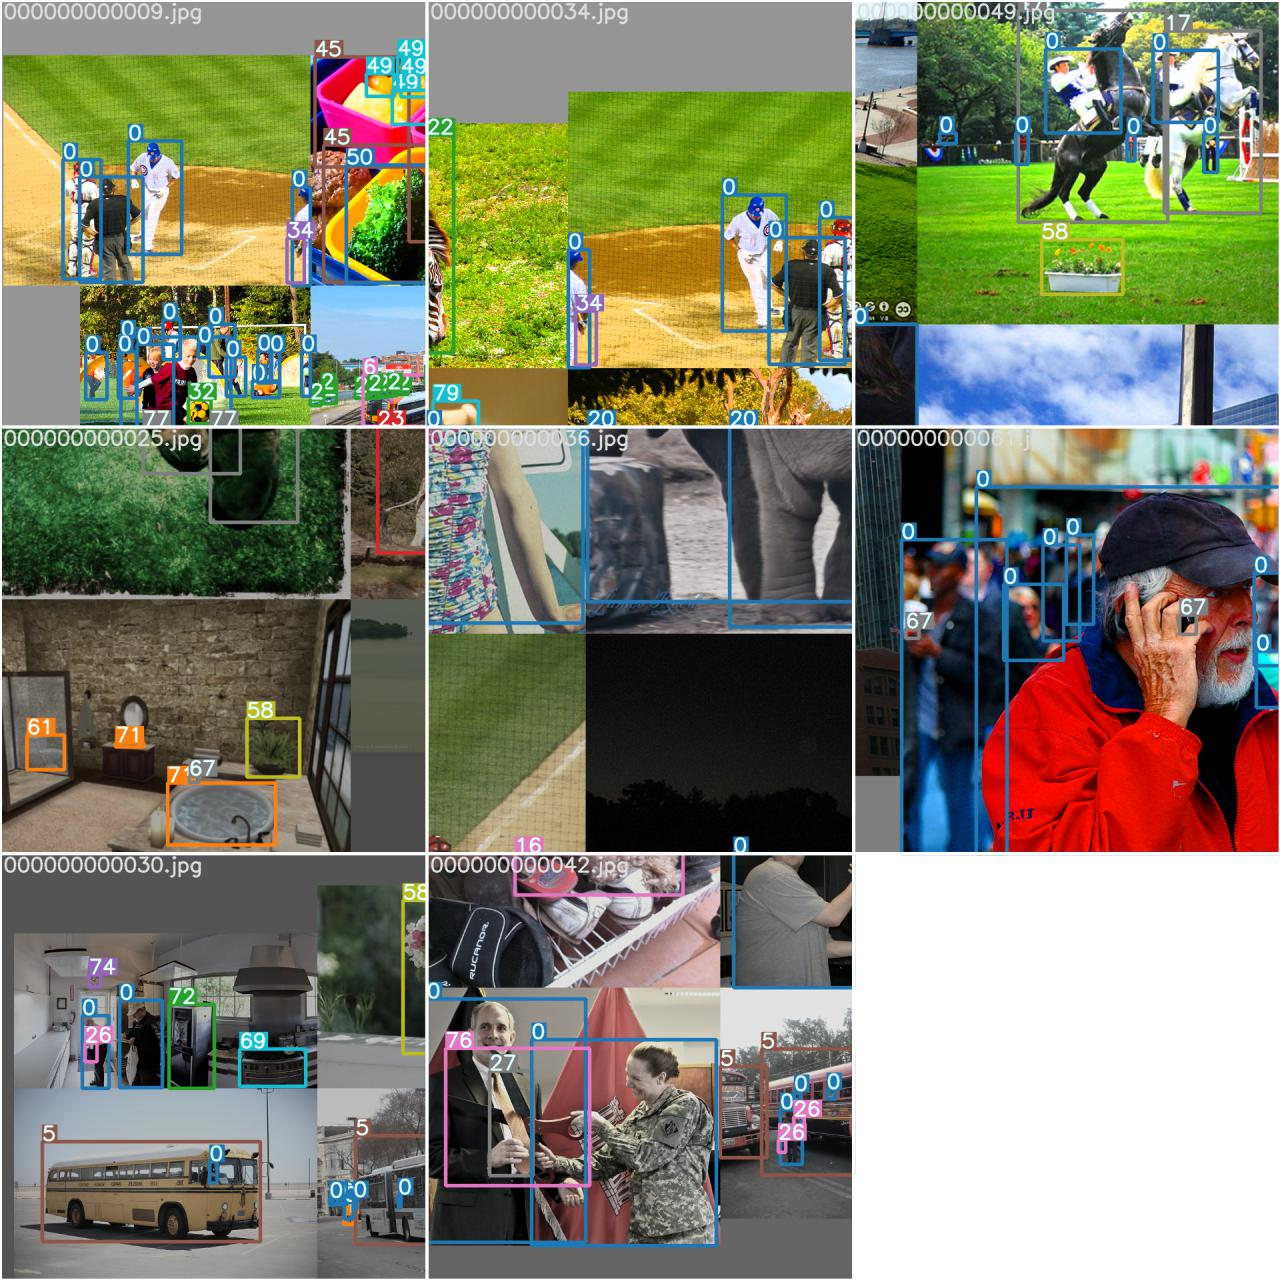

In [10]:
Image(filename=os.path.join(yolov5_dir,'runs/train/exp/train_batch0.jpg'), width=900)

## 3. Inference (detect)

In [13]:
%cd $yolov5_dir
!python detect.py --source D:/external_datasets/mlab_samples/VIDEOS --output  D:/external_datasets/mlab_samples/inference/yolov5/yolov5s_coco128test_augment --weights runs/exp0/weights/best.pt --conf 0.4 --augment

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5
Namespace(agnostic_nms=False, augment=True, classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, output='D:/external_datasets/mlab_samples/inference/yolov5/yolov5s_coco128test_augment', save_txt=False, source='D:/external_datasets/mlab_samples/VIDEOS', update=False, view_img=False, weights=['runs/exp0/weights/best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='GeForce GTX 1070', total_memory=8192MB)

Fusing layers... Model Summary: 140 layers, 7.45958e+06 parameters, 6.61683e+06 gradients
video 1/9 (1/53) D:\external_datasets\mlab_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 1 persons, Done. (0.050s)
video 1/9 (2/53) D:\external_datasets\mlab_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 2 persons, Done. (0.042s)
video 1/9 (3/53) D:\external_datasets\mlab_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 2 persons, Done. (0.041s)
video 1/9 (4/53) D:\external_datase

## 4. (Re-) Test/validate

(Re-) Test a model on dataset to determine trained accuracy (WARNING : Train already does this). Models are auto-downloaded from Google Drive. To show results by class use the --verbose flag.

In [13]:
# SHELL Ipython: Run YOLOv5x on COCO validation images
%cd $yolov5_dir
!python test.py --weights yolov5x.pt --data $yaml --task 'val' --img 672 

/mnt/c/Users/nmc_costa/google_drive/projects/bosch_P19/research/python_ws/violent_action/yolo/yolov5
Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/mnt/c/Users/nmc_costa/google_drive/projects/bosch_P19/research/python_ws/violent_action/yolo/coco128_external.yaml', device='', img_size=672, iou_thres=0.65, merge=False, save_json=False, single_cls=False, task='val', verbose=False, weights=['yolov5x.pt'])
Using CUDA device0 _CudaDeviceProperties(name='GeForce GTX 1070', total_memory=8192MB)

Fusing layers... Model Summary: 284 layers, 8.89222e+07 parameters, 8.89222e+07 gradients
Scanning labels /mnt/d/external_datasets/yoloformat/coco128/labels/train2017.cac
               Class      Images     Targets           P           R      mAP@.5
                 all         128         929       0.499       0.888       0.856       0.648
Speed: 58.6/13.7/72.3 ms inference/NMS/total per 672x672 image at batch-size 32
